In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Config
c_url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
# Frecuencia en días
c_freq = 3
# Periodos
c_periods = 6

In [3]:
# Load csv 
df = pd.read_csv(c_url)

In [4]:
# Preprocessing
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
last_fecha = df['Fecha'].max()

In [5]:
# dfV: Registros con los valores acumulados cada x días
fFechas = pd.date_range(end=last_fecha, freq= str(c_freq) + 'D', periods=c_periods+1)
filtro = df['Fecha'].isin(fFechas)
dfV = df[filtro].copy()

# Indices
dfV.set_index(['Provincia', 'Fecha'], inplace=True)
dfV.sort_index(level=['Provincia', 'Fecha'], inplace=True)

# Ordenar columnas
dfV.columns = ['Hospitalizadas', 'Curadas', 'Bajas']

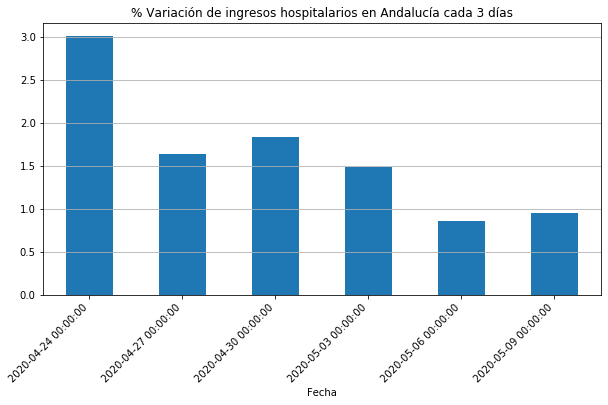

In [6]:
# dfG: Variación en porcentaje con respecto al registro anterior
dfG = dfV.groupby(level='Provincia').pct_change()*100
dfG.dropna(how='all', inplace=True)
titulo = '% Variación de ingresos hospitalarios en Andalucía cada ' + str(c_freq) + ' días'
dfG.loc['Total']['Hospitalizadas'].plot(title=titulo, kind='bar', figsize=(10,5)).grid(axis='y')
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

In [7]:
# dfN: Nuevos casos cada x días
dfN = dfV.diff()
first_fecha = fFechas.min()

# Se borra la primera fila ya que no tiene valores anteriores y su resultado no tiene sentido
dfN.drop(index=first_fecha, level='Fecha', inplace=True)
# Alternativa seleccionando las filas y borrando
#delete_rows = dfN.loc[(slice(None), [first_fecha]), :].index
#dfN.drop(delete_rows, inplace=True)

# Se borran las filas de Total
dfN.drop(index='Total', level='Provincia', inplace=True)

In [8]:
print('Sin nuevos ingresos hospitalarios en los ' + str(c_freq) + ' días anteriores desde el día...')
print(dfN.sort_index()[ dfN['Hospitalizadas'] == 0 ][0:1]['Hospitalizadas'] )

Sin nuevos ingresos hospitalarios en los 3 días anteriores desde el día...
Provincia  Fecha     
Almería    2020-05-06    0.0
Name: Hospitalizadas, dtype: float64


In [9]:
df.head()

,Provincia,Ingresados,Altas,Bajas,Fecha
0,Almería,0,0,0,2020-03-13
1,Cádiz,1,0,0,2020-03-13
2,Córdoba,3,0,0,2020-03-13
3,Granada,3,0,0,2020-03-13
4,Huelva,0,0,0,2020-03-13


## Detalle de una provincia

In [10]:
# Detalle de una provincia
c_provincia = 'Cádiz'

In [11]:
# Seleccionar los datos a partir del Dataframe original
fFechas = pd.date_range(start=df['Fecha'].min(), end=df['Fecha'].max(), freq=str(c_freq) + 'D')
filtro = df['Fecha'].isin(fFechas)
dfV0 = df[filtro].copy()

# Borrar columnas sobrantes
dfV0.drop(['Altas', 'Bajas'], axis='columns', inplace=True)

# Indices
dfV0.set_index(['Provincia', 'Fecha'], inplace=True)
dfV0.sort_index(level=['Provincia', 'Fecha'], inplace=True)

# Calcular los nuevos casos de cada rango. 
dfV0['Nuevos'] = dfV0.diff()

# Borrar el primer día ya que no tiene anteriores
dfV0.drop(df['Fecha'].min(), level='Fecha', inplace=True)

# Los negativos ponerlos a 0
dfV0[slice(None)][dfV0['Nuevos'] < 0] = 0

# Borrar la fila de Total
dfV0.drop(index='Total', level='Provincia', inplace=True)

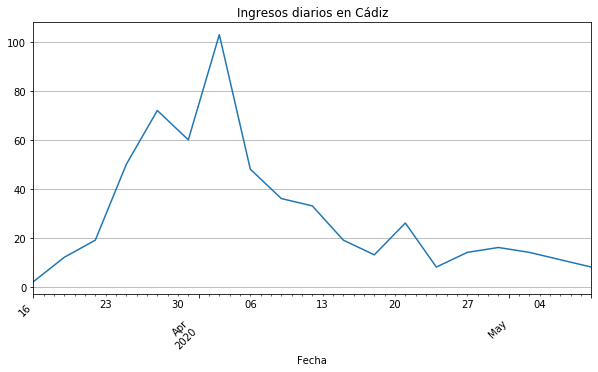

In [12]:
dfV0.loc[c_provincia]['Nuevos'].plot(title='Ingresos diarios en ' + c_provincia, figsize=(10,5)).grid(axis='y')
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

In [13]:
titulo = 'Nuevos casos en ' + c_provincia + ' en los ' + str(c_freq) + ' días anteriores'
print(titulo)
print(dfN.loc[c_provincia]['Hospitalizadas'])

Nuevos casos en Cádiz en los 3 días anteriores
Fecha
2020-04-24     8.0
2020-04-27    14.0
2020-04-30    16.0
2020-05-03    14.0
2020-05-06    11.0
2020-05-09     8.0
Name: Hospitalizadas, dtype: float64


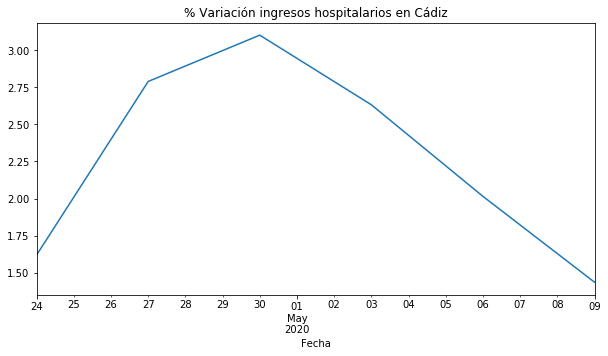

In [14]:
dfG.loc[c_provincia]['Hospitalizadas'].plot(title='% Variación ingresos hospitalarios en ' + c_provincia, figsize=(10,5))
plt.show()

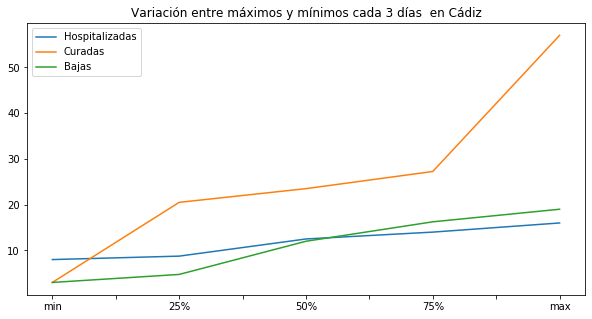

In [15]:
titulo = 'Variación entre máximos y mínimos cada ' + str(c_freq) + ' días  en ' + c_provincia
dfN.loc[c_provincia].describe().loc['min':'max'].plot(title=titulo, figsize=(10,5))
plt.show()

### Últimos 10 días

In [16]:
c_last = 10
data = df.set_index(['Provincia', 'Fecha']).loc[c_provincia][['Ingresados', 'Altas', 'Bajas']].diff().tail(c_last).copy()
data.columns = ['Hospitalizadas', 'Curadas', 'Bajas']
titulo = 'Nuevos casos en los últimos ' + str(c_last) + ' días en ' + c_provincia

Nuevos casos en los últimos 10 días en Cádiz. (Nuevos ingresos hospitalarios)


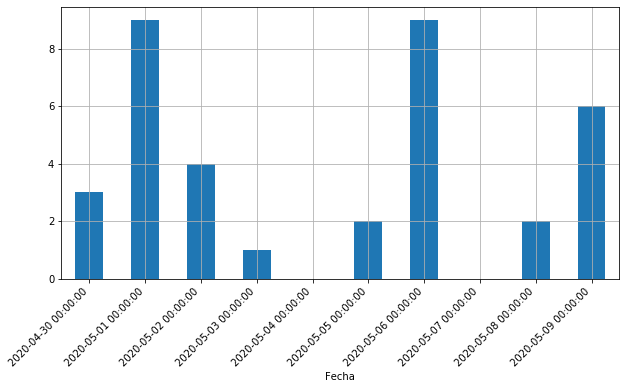

In [17]:
print(titulo + '. (Nuevos ingresos hospitalarios)')
data['Hospitalizadas'].plot(kind='bar', grid=True, figsize=(10,5))
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

In [18]:
print(titulo)
print(data)

Nuevos casos en los últimos 10 días en Cádiz
            Hospitalizadas  Curadas  Bajas
Fecha                                     
2020-04-30             3.0      3.0    5.0
2020-05-01             9.0     13.0   16.0
2020-05-02             4.0     12.0    3.0
2020-05-03             1.0      0.0    0.0
2020-05-04             0.0      1.0    0.0
2020-05-05             2.0      6.0    1.0
2020-05-06             9.0     13.0    2.0
2020-05-07             0.0      8.0    0.0
2020-05-08             2.0     12.0    0.0
2020-05-09             6.0     37.0    3.0


In [19]:
data.describe()

,Hospitalizadas,Curadas,Bajas
count,10.000000,10.000000,10.000000
mean,3.600000,10.500000,3.000000
std,3.373096,10.554093,4.876246
min,0.000000,0.000000,0.000000
25%,1.250000,3.750000,0.000000
50%,2.500000,10.000000,1.500000
75%,5.500000,12.750000,3.000000
max,9.000000,37.000000,16.000000
